# Supervised Learning Project - 

## GOAL: Create a model to predict whether or not a customer will Churn .

## The data file is "Telco-Customer-Churn.csv"

<h4><b>Importing Libraries</b></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4><b>Reding the dataset</b></h4>

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

In [4]:
df.shape

(7032, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<h4><b>Some of the feature are categerical and some are numrical</b></h4>

In [7]:
df.select_dtypes(include = ['integer','float'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7027,0,24,84.80,1990.50
7028,0,72,103.20,7362.90
7029,0,11,29.60,346.45
7030,1,4,74.40,306.60


In [8]:
df.select_dtypes(exclude = ['integer','float'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7028,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7030,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h4><b>Checking if any customer is repeated or duplicated in dataset</b></h4>

In [10]:
count = df['customerID'].value_counts()>1
count.sum()

0

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
for col in df.columns:
    print(f'{col} unique values\n',df[col].unique())

customerID unique values
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values
 ['Female' 'Male']
SeniorCitizen unique values
 [0 1]
Partner unique values
 ['Yes' 'No']
Dependents unique values
 ['No' 'Yes']
tenure unique values
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService unique values
 ['No' 'Yes']
MultipleLines unique values
 ['No phone service' 'No' 'Yes']
InternetService unique values
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values
 ['No' 'Yes' 'No internet service']
OnlineBackup unique values
 ['Yes' 'No' 'No internet service']
DeviceProtection unique values
 ['No' 'Yes' 'No internet service']
TechSupport unique values
 ['No' 'Yes' 'No internet service']
StreamingTV unique values
 ['No' 'Yes' 'No internet service']
StreamingMovies un

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h4><b>Distribution of gender column.</b></h4>

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h4><b>Distribution of gender column per churn rate.</b></h4>

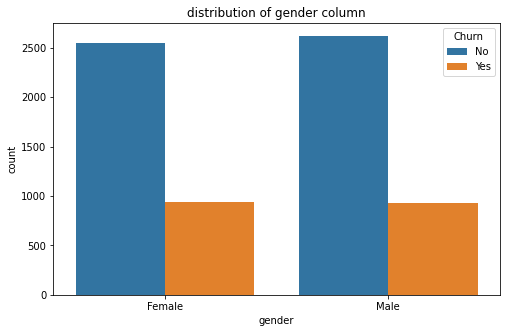

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['gender'],hue=df['Churn'])
plt.title('distribution of gender column');

<h4><b>Distribution of Internet Service per churn rate.</b></h4>

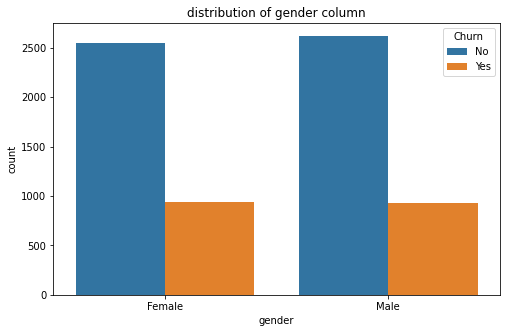

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['gender'],hue=df['Churn'])
plt.title('distribution of gender column');

<h4><b>Distribution of Phone Service per churn rate</b></h4>

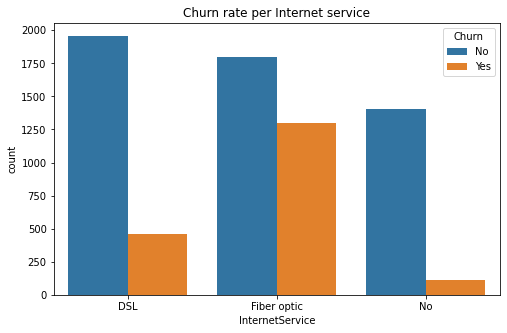

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['InternetService'],hue=df['Churn'])
plt.title('Churn rate per Internet service');

<h4><b>Distribution of Multiple line Service per churn rate</b></h4>

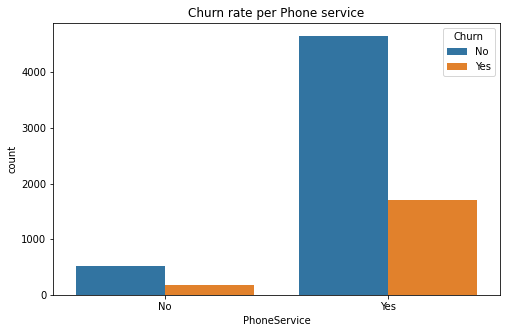

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['PhoneService'],hue=df['Churn'])
plt.title('Churn rate per Phone service');

<h4><b>Distribution of TotalCharges per Contract type, based on the Churn class.</b></h4>

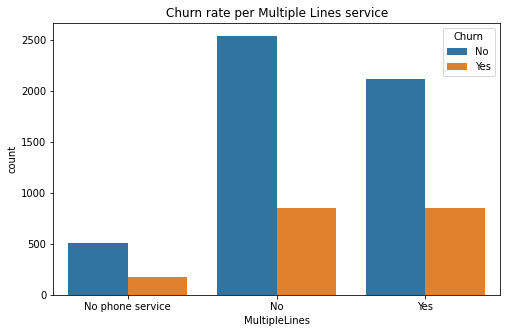

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['MultipleLines'],hue=df['Churn'])
plt.title('Churn rate per Multiple Lines service');

<h4><b>Based on the tenure column values, we will create a new column called Tenure Cohort that creates 4 separate categories</b></h4>
<ul>
  <li>'0-20 Months'</li>
  <li>'20-40 Months'</li>
  <li>'40-60 Months'</li>
  <li>'Above 60 Months'</li>
</ul>   

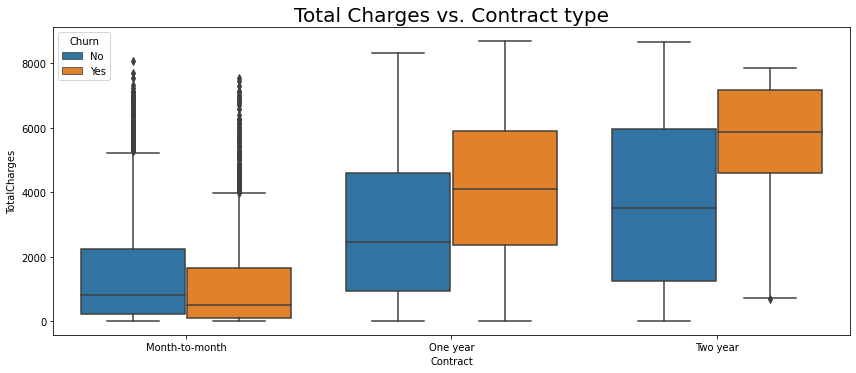

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x= 'Contract', y='TotalCharges',hue='Churn',dodge=True)
plt.tight_layout()
plt.title('Total Charges vs. Contract type',fontsize=20);

In [21]:
def tenure_group(tenure):
    if tenure < 20:
        return '0-20 Month'
    elif tenure < 40:
        return '20-40 Month'
    elif tenure < 60:
        return '40-60 Month'
    else:
        return 'Above 60 Month'

In [22]:
df['tenure_cohort']=df['tenure'].apply(tenure_group)

<h4><b>Distribution of tenure cohort per contract type and churn rate</b></h4>

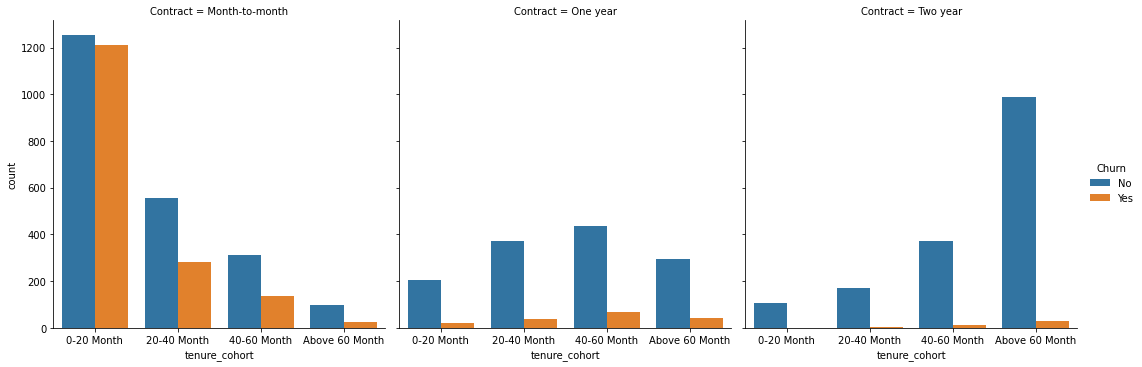

In [23]:
sns.catplot(data=df,x='tenure_cohort',col='Contract',hue='Churn',kind='count');

<h4><b>Distribution of tenure cohort per contract type and gender</b></h4>

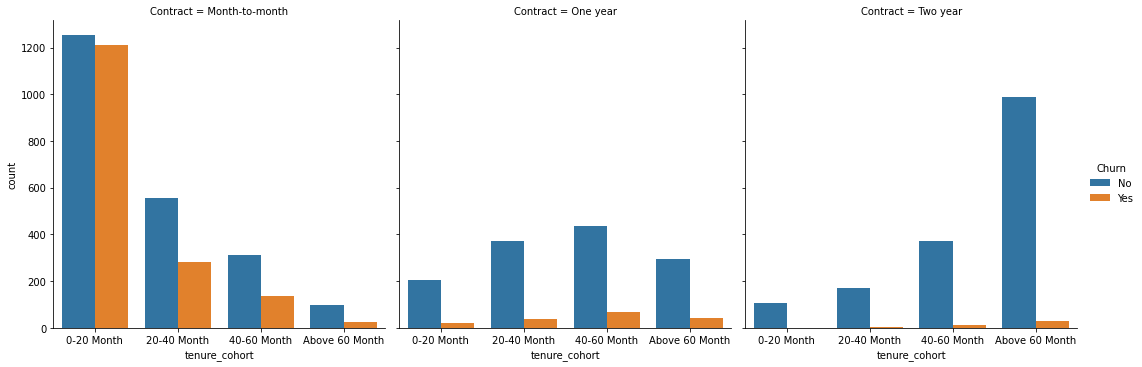

In [24]:
sns.catplot(data=df,x='tenure_cohort',col='Contract',hue='Churn',kind='count');

<h4><b>Total Charges versus Monthly Charts based on tenure cohort</b></h4>

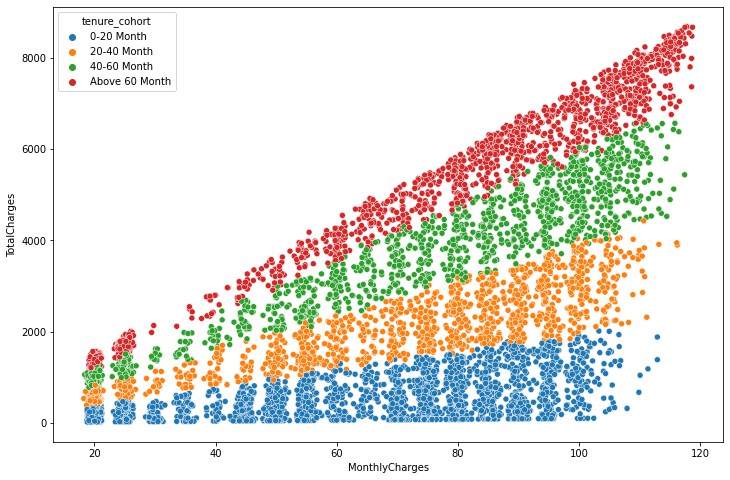

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data =df,x='MonthlyCharges',y='TotalCharges',hue='tenure_cohort');

<h4><b> Distribution of the Phone services with respect to the churn yes vs. their monthly charges avg.</b></h4>

In [26]:
yes_phoneservice = df[(df['PhoneService']=='Yes')&(df['Churn']=='Yes')]['MonthlyCharges'].mean()
no_phoneservice = df[(df['PhoneService']=='No')&(df['Churn']=='Yes')]['MonthlyCharges'].mean()

phone = pd.DataFrame(data = {'Monthly Charges avg.':[yes_phoneservice,no_phoneservice],
                             'Phone service':['yes_phoneservice','no_phoneservice']})

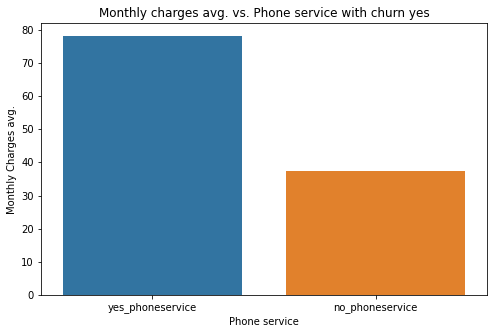

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=phone,x='Phone service',y= 'Monthly Charges avg.')
plt.title('Monthly charges avg. vs. Phone service with churn yes');

<h4><b> Distribution of the Internet services with respect to the churn yes vs. their monthly charges avg.</b></h4>

In [28]:
DSL_internet = df[(df['InternetService']=='DSL')&(df['Churn']=='Yes')]['MonthlyCharges'].mean()
Fiber_internet = df[(df['InternetService']=='Fiber optic')&(df['Churn']=='Yes')]['MonthlyCharges'].mean()
No_internet = df[(df['InternetService']=='No')&(df['Churn']=='Yes')]['MonthlyCharges'].mean()

internet = pd.DataFrame(data = {'Monthly Charges avg.':[DSL_internet,Fiber_internet,No_internet],
                             'Internet service':['DSL_internet','Fiber_internet','No_internet']})

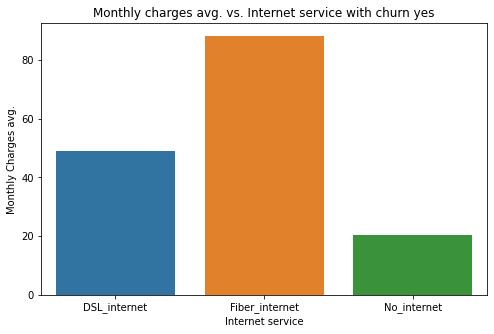

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=internet,x='Internet service',y='Monthly Charges avg.')
plt.title('Monthly charges avg. vs. Internet service with churn yes');

<h4><b>Key Observation from EDA</b></h4>

<ul>
<li>Churn rate for both gender i.e. male and female is nearly same</li>
<li>As the no. of services is increases churn rate of the customer is relatively increases.</li>
<li>For the small contract duration churn rate is high and it lowers as contract duration is increases.</li>
<li>But also as the total charges are increases over the period the customer with long contract duration tends to churn.</li>
<li>For the Phone service and internet service, those customer who buy this services see increases in their monthly charges and hence tends to churn.</li>
</ul>

**Now we will convert categorical features into dummy variables first, to calculate correlation with target feature.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_cohort        object
dtype: object

In [31]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [32]:
df_new = df.drop(['customerID','tenure_cohort'],axis=1)

In [33]:
df_new.shape

(7032, 20)

In [34]:
df_new = pd.get_dummies(df_new,drop_first=True)

In [35]:
df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [36]:
corr_churnyes = df_new.corr()['Churn_Yes'].sort_values()

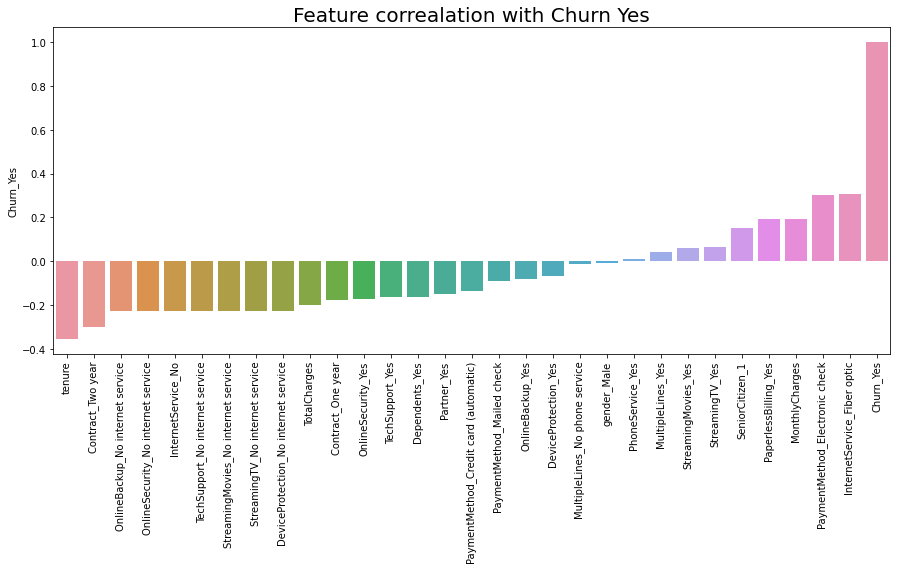

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x=corr_churnyes.index,y=corr_churnyes)
plt.xticks(rotation=90)
plt.title('Feature correalation with Churn Yes',fontsize=20);

-----

# Part 3: Predictive Modeling



## Single Decision Tree

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-20 Month
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,20-40 Month
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-20 Month
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-60 Month
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-20 Month


In [39]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_cohort        object
dtype: object

In [40]:
df = df.drop(['customerID','tenure_cohort'],axis=1)

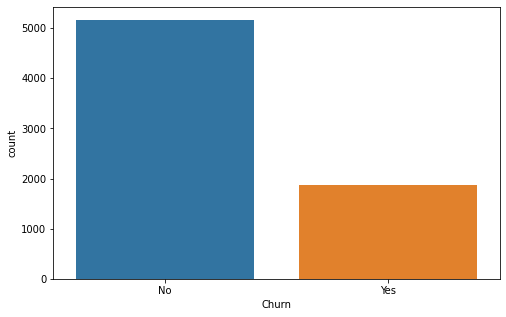

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Churn');

<h4><b>As Churn (target value) is not evenly distributed we will use the balanced weightage in modeling</b></h4>

In [42]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [43]:
X = pd.get_dummies(X,drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix

In [47]:
tree_model = DecisionTreeClassifier(class_weight='balanced')

In [48]:
tree_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [49]:
param_grid = {'criterion':["gini", "entropy"],
             'max_features':["sqrt", "log2"],
             'max_depth':[2,3,4],
             'max_leaf_nodes':[2,3,4]}

In [50]:
grid_model = GridSearchCV(tree_model,param_grid=param_grid)

In [51]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4]})

In [52]:
grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=4)

In [53]:
prediction = grid_model.predict(X_test)

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.86      0.67      0.75      1033
         Yes       0.43      0.69      0.53       374

    accuracy                           0.67      1407
   macro avg       0.64      0.68      0.64      1407
weighted avg       0.74      0.67      0.69      1407



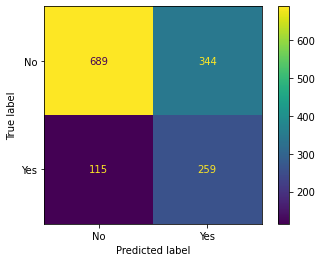

In [55]:
plot_confusion_matrix(grid_model,X_test,y_test);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier(class_weight='balanced')

In [58]:
rf_param_grid ={'n_estimators':[50,100,120],
                'max_features':[3,4,5], 
                'max_depth':[2,3,4,5], 
                'max_leaf_nodes':[6,7,8]}

In [59]:
rf_grid_model = GridSearchCV(rf_model,param_grid=rf_param_grid)

In [60]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [3, 4, 5],
                         'max_leaf_nodes': [6, 7, 8],
                         'n_estimators': [50, 100, 120]})

In [61]:
rf_grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       max_leaf_nodes=8)

In [62]:
rf_model= RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=5,max_leaf_nodes=8)

In [63]:
rf_prediction = rf_grid_model.predict(X_test)

In [64]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

          No       0.90      0.70      0.79      1033
         Yes       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



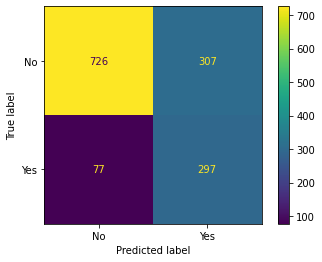

In [65]:
plot_confusion_matrix(rf_grid_model,X_test,y_test);

## Boosted Trees



In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
adboost_model = AdaBoostClassifier()

In [69]:
error_rates = []

for n in range(1,21):
    
    model = AdaBoostClassifier(base_estimator=rf_model,n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

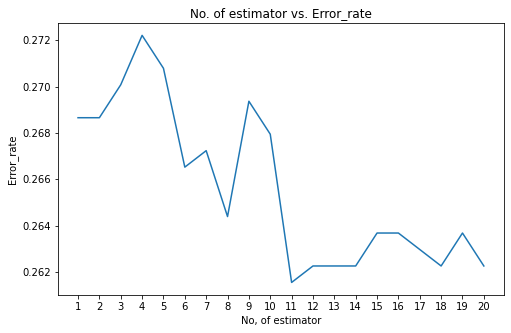

In [71]:
plt.figure(figsize=(8,5))
plt.plot(range(1,21),error_rates)
plt.title('No. of estimator vs. Error_rate')
plt.xlabel('No, of estimator')
plt.ylabel('Error_rate')
plt.xticks(range(1,21));

<h4><b>From the error rate graph we wiil select no. estimators is 11 </b></h4>

In [77]:
adboost_model = AdaBoostClassifier(base_estimator=rf_model,n_estimators=11)

In [78]:
adboost_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=5,
                                                         max_features=5,
                                                         max_leaf_nodes=8),
                   n_estimators=11)

In [79]:
ad_prediction = adboost_model.predict(X_test)

In [80]:
print(classification_report(y_test,ad_prediction))

              precision    recall  f1-score   support

          No       0.91      0.71      0.80      1033
         Yes       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



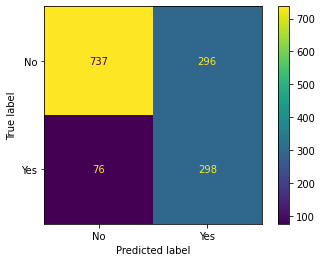

In [81]:
plot_confusion_matrix(adboost_model,X_test,y_test)